In [1]:
def compress_vector(vector, count):
    for _ in range(count):
        new_vector = []
        for i in range(0, len(vector) - 1, 2):
            new_vector.append((vector[i] + vector[i + 1]) / 2)
        vector = new_vector
    return vector


In [2]:
import open3d as o3d
import os
import time
import pymeshlab as pml
import numpy as np

def o3d_to_pml(mesh):
    tmp_file_name = "temp.obj"
    o3d.io.write_triangle_mesh(tmp_file_name, mesh)
    if not os.path.exists(tmp_file_name):
        print(f"File '{tmp_file_name}' doesn't exist. Waiting for 1 second...")
        time.sleep(1)    
    mesh_pml = pml.MeshSet()
    mesh_pml.load_new_mesh(tmp_file_name)
    os.remove(tmp_file_name)
    return mesh_pml

def pml_to_o3d(mesh):
    tmp_file_name = "temp.obj"

    mesh.save_current_mesh(tmp_file_name)
    if not os.path.exists(tmp_file_name):
        print(f"File '{tmp_file_name}' doesn't exist. Waiting for 1 second...")
        time.sleep(1)   
    mesh_o3d = o3d.io.read_triangle_mesh(tmp_file_name)
    os.remove(tmp_file_name)
    return mesh_o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
def get_object_image(mesh):
    vertices = np.asarray(mesh.vertices)

    grid1 = np.zeros((150, 150))
    grid2 = np.zeros((150, 150))
    grid3 = np.zeros((150, 150))

    for x1, y1, z1 in vertices:
        x = round(75 + x1 * 100)
        y = round(75 + y1 * 100)
        z = round(75 + z1 * 100)
        
        if x < 150 and y < 150:
            grid1[x][y] = 1
        if y < 150 and z < 150:
            grid2[y][z] = 1
        if x < 150 and z < 150:
            grid3[x][z] = 1

    return grid1, grid2, grid3

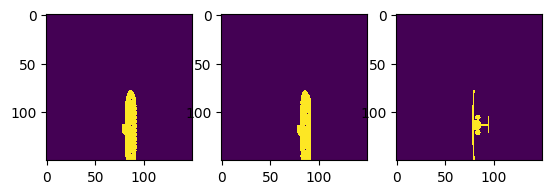

In [6]:
import matplotlib.pyplot as plt
import open3d as o3d
import glob

paths = glob.glob(os.path.join("../../resampledDatabase/Jet", '*'))[:3]

f, axarr = plt.subplots(1,len(paths))

for i in range(len(paths)):
    mesh = o3d.io.read_triangle_mesh(paths[i])

    mesh = o3d_to_pml(mesh)
    mesh.meshing_isotropic_explicit_remeshing(targetlen=pml.AbsoluteValue(0.01), iterations=5)
    mesh = pml_to_o3d(mesh)

    grid1, _, _ = get_object_image(mesh)

    axarr[i].imshow((grid1), interpolation='nearest')